In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
# read the ola dataset
df= pd.read_csv("C:/Users/miniw/Downloads/ola.csv")
df

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213
...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51


In [3]:
# size of the dataset
df.shape

(10886, 9)

In [4]:
# checking which column contain which kind of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.5+ KB


In [6]:
# observing the null values
df.describe().T # used T to convert columns to rows

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.0,1.0000,2.00,3.0000,4.00
weather,10886.0,2.491916,1.123139,1.0,1.0000,2.00,4.0000,4.00
temp,10886.0,20.137973,8.696625,5.0,12.6300,20.19,27.7075,35.00
humidity,10886.0,59.946072,22.987200,20.0,40.0400,59.97,79.6200,99.98
windspeed,10886.0,24.960981,14.424684,0.0,12.5225,25.00,37.4275,49.99
casual,10886.0,24.517545,14.390014,0.0,12.0000,25.00,37.0000,49.00
registered,10886.0,99.551442,57.541131,0.0,50.0000,100.00,149.0000,199.00
count,10886.0,124.068988,59.449265,0.0,74.0000,124.00,174.0000,248.00


In [7]:
# Feature Engineering
# seperating date and time
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4


In [8]:
# extracting the day, month, and year from the date column
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,2011,1,1


In [9]:
# effects of a weekend or a weekday on the ride request count
from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan 

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0


In [10]:
# effects of bike ride demands whether it is am or pm
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0


In [15]:
!pip install holidays

     -------------------------------------- 932.3/932.3 kB 4.5 MB/s eta 0:00:00


In [16]:
# making a column indicating whether there was any holiday on a particular day or not
from datetime import date
import holidays

def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0,0


In [18]:
# removing unused columns
df.drop(['datetime', 'date'],
        axis=1,
        inplace=True)

In [19]:
df

,season,weather,temp,humidity,windspeed,casual,registered,count,time,day,month,year,weekday,am_or_pm,holidays
0,3,2,6.66,76.62,9.57,5,128,133,0,1,1,2011,0,0,0
1,4,3,13.54,55.91,4.01,36,184,220,1,1,1,2011,0,0,0
2,1,3,29.58,20.97,33.61,34,97,131,2,1,1,2011,0,0,0
3,3,1,7.40,61.64,15.85,6,47,53,3,1,1,2011,0,0,0
4,3,4,30.66,98.71,11.47,14,199,213,4,1,1,2011,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,4,28.24,67.88,47.74,48,28,76,9,29,3,2012,1,0,0
10882,3,4,17.13,22.36,15.27,4,1,5,10,29,3,2012,1,0,0
10883,3,3,19.83,99.17,30.35,38,10,48,11,29,3,2012,1,0,0
10884,2,4,15.70,77.30,40.16,36,15,51,12,29,3,2012,1,1,0


In [20]:
# Exploratory Data Analysis (EDA)
# checking for the null values
df.isnull().sum()

season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

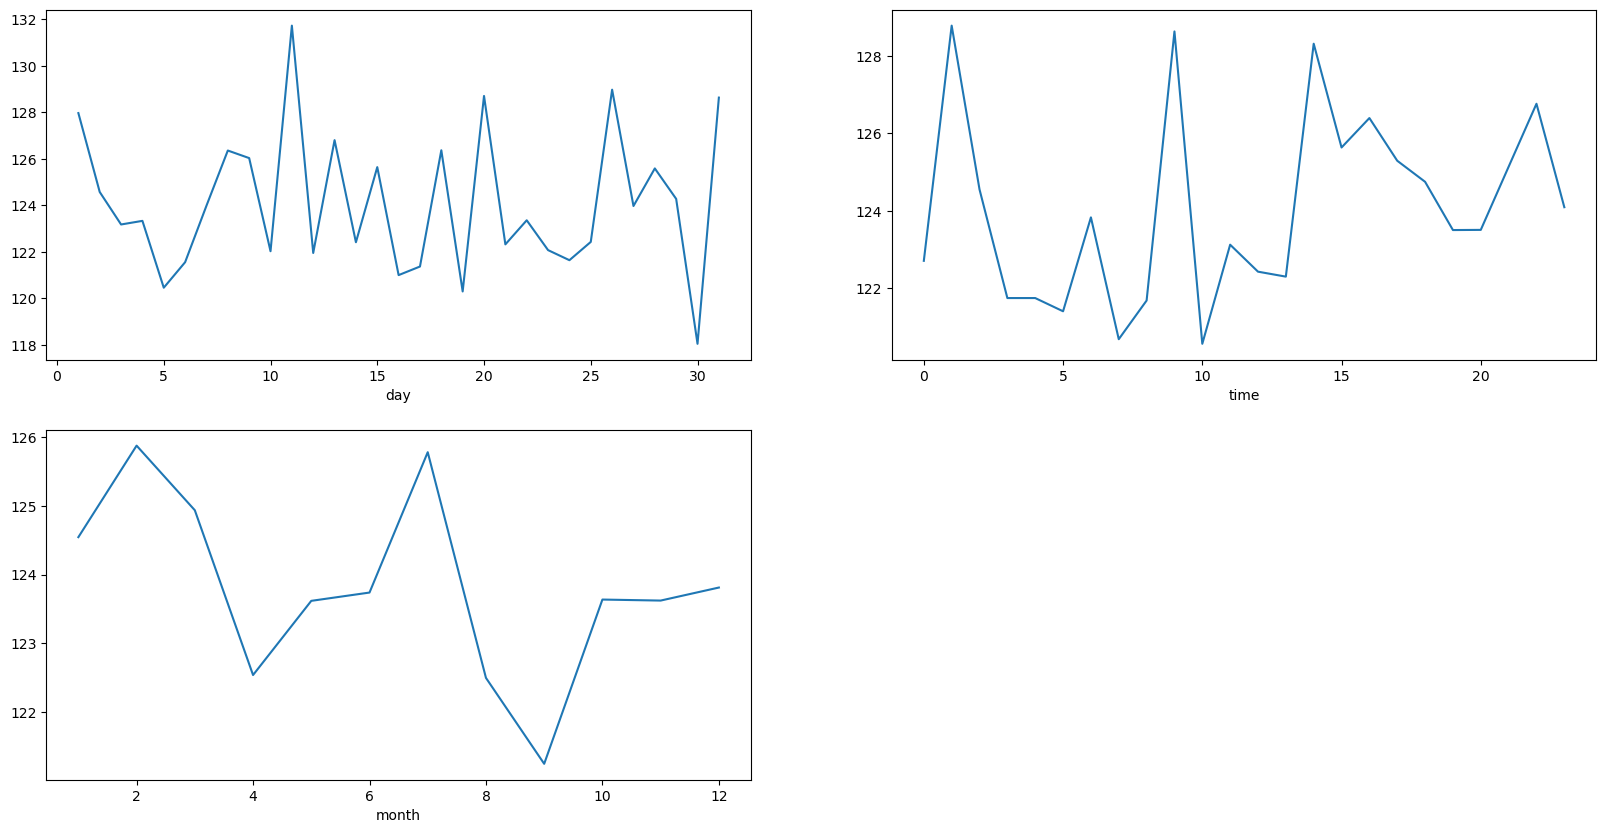

In [29]:
# relation between the ride request count with respect to the day, time, or month
features = ['day', 'time', 'month']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()

In [22]:
# From the above line plots we can confirm some real-life observations:

# There is no such pattern in the day-wise average of the ride requests.
# More ride requests in the working hours as compared to the non-working hours.
# The average ride request count has dropped in the month of festivals that is after the 7th month that is July that is due to more holidays in these months.

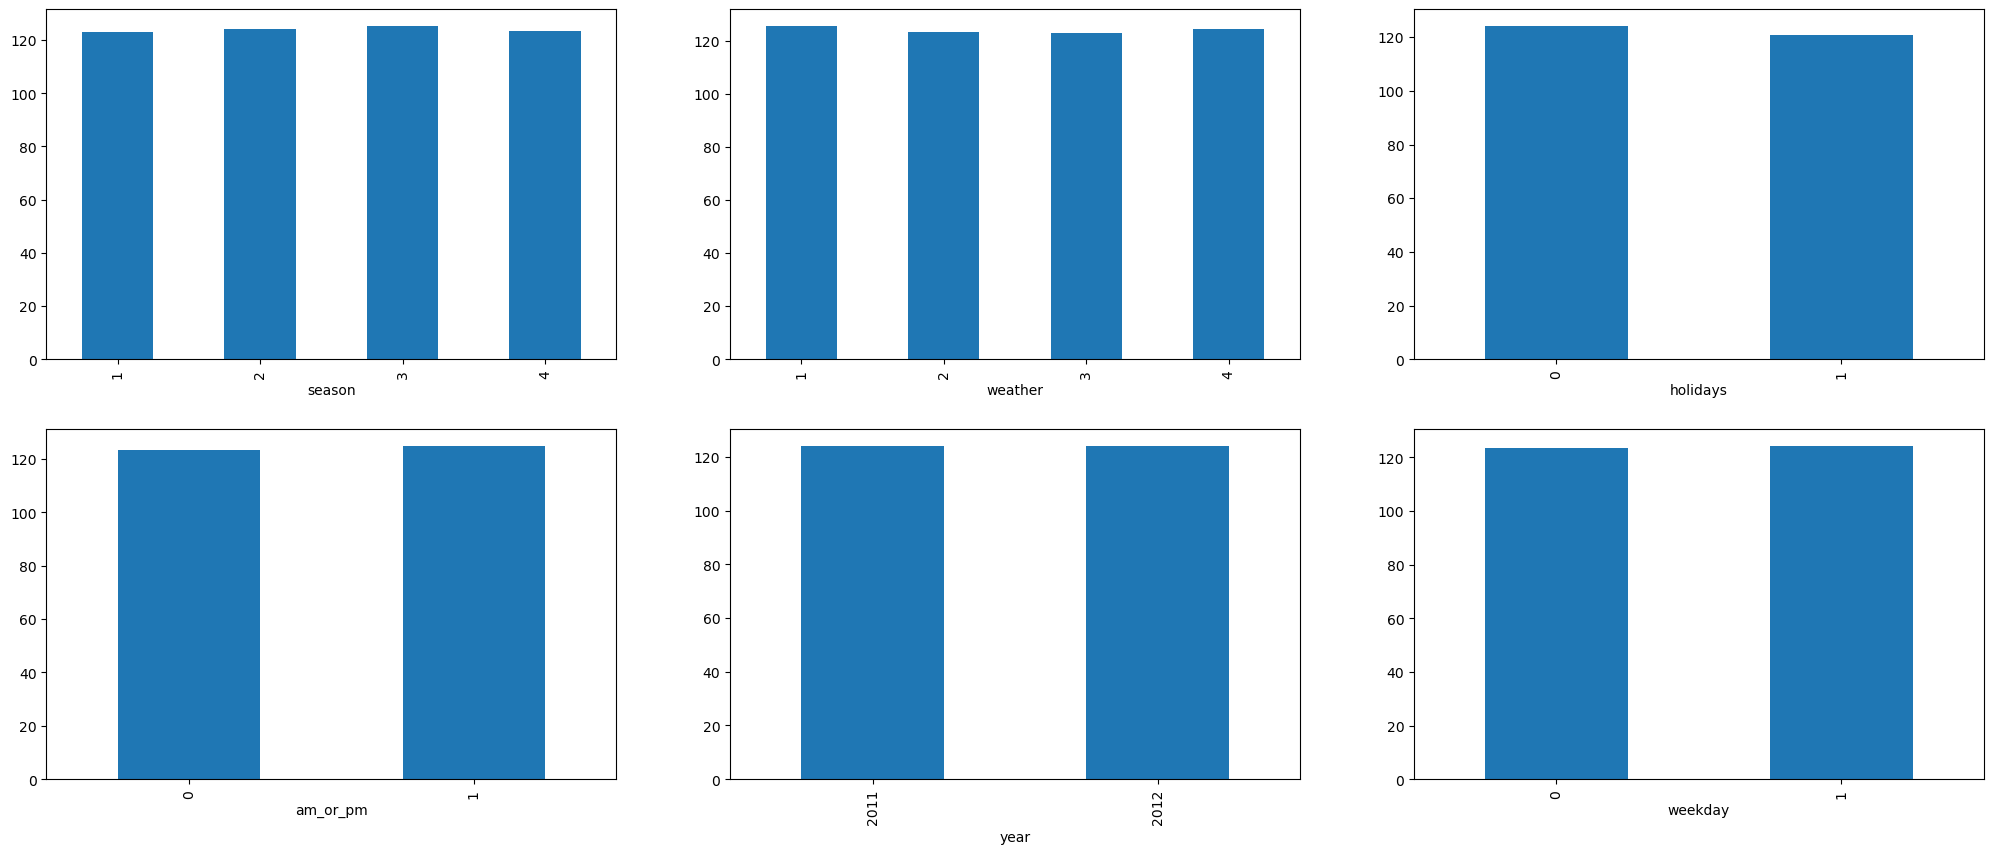

In [33]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(25, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()

In [24]:
# From the above bar plots we can confirm some real-life observations:

# Ride request demand is high in the summer as well as season.
# The third category was extreme weather conditions due to this people avoid taking bike rides and like to stay safe at home.
# On holidays no college or offices are open due to this ride request demand is low.
# More ride requests during working hours as compared to non-working hours.
# Bike ride requests have increased significantly from the year 2011 to the year 2012.

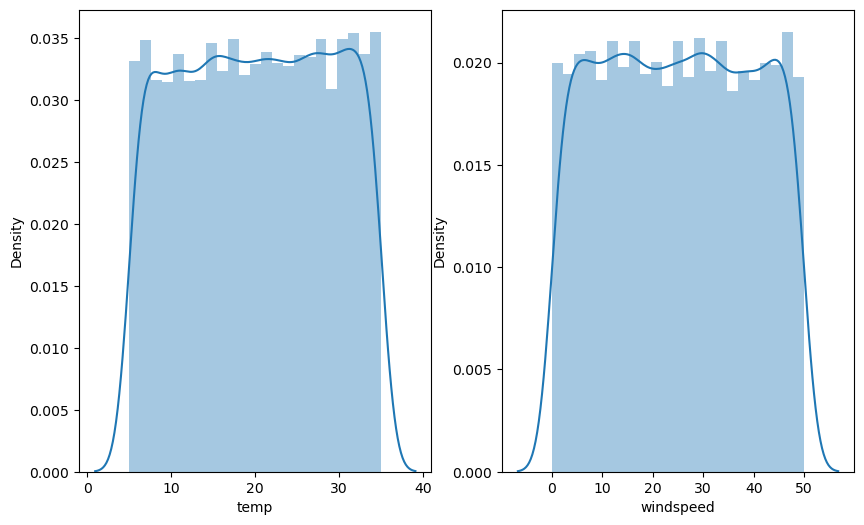

In [38]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(10,6))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()

In [26]:
# Temperature values are normally distributed but due to the high number of 0 entries in the windspeed column, the data distribution shows some irregularities.

In [48]:
for col in ['temp', 'windspeed']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"Outliers in '{col}':")
    print(outliers if not outliers.empty else "No outliers found")
    print('-' * 40)


Outliers in 'temp':
No outliers found
----------------------------------------
Outliers in 'windspeed':
No outliers found
----------------------------------------


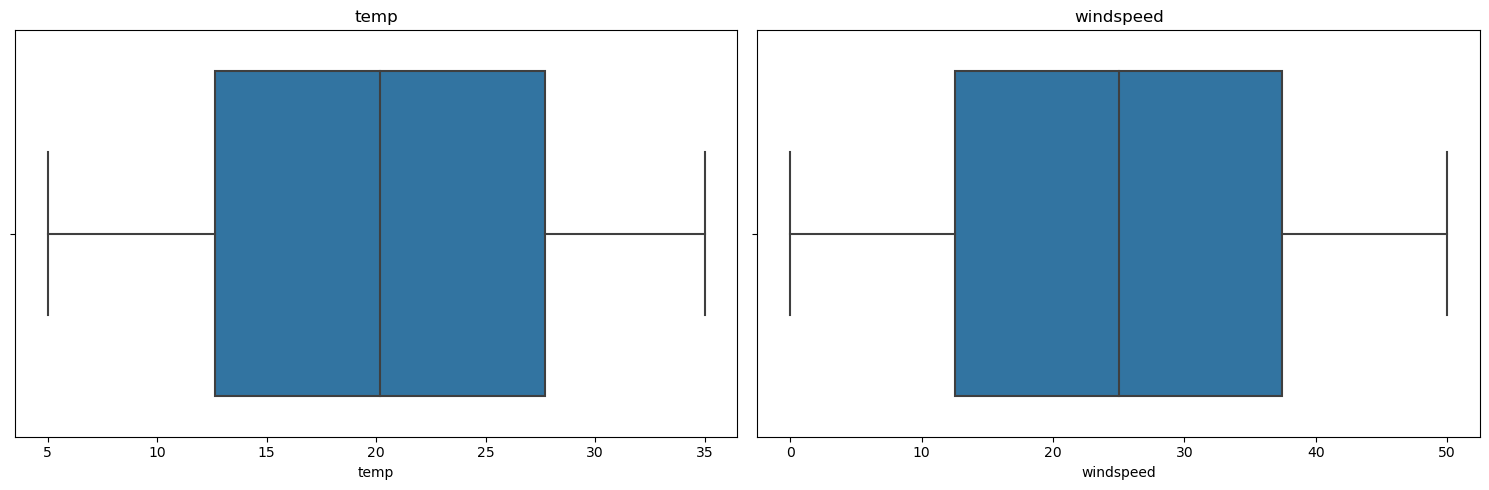

In [47]:
features = ['temp', 'windspeed']

plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(x=df[col], showfliers=True)  # ensures outliers are shown
    plt.title(col)

plt.tight_layout()
plt.show()

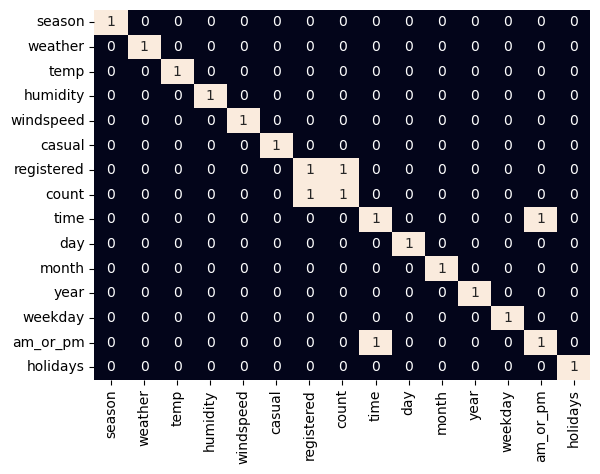

In [51]:
# to check whether there are any highly correlated features in our dataset or not
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [52]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

In [53]:
# model training
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape

((6295, 12), (700, 12))

In [54]:
# normalizing the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [55]:
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} :')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() :
Training Error :  49.76705929871842
Validation Error :  49.45474577267431

Lasso() :
Training Error :  49.806780458411176
Validation Error :  49.372163863241035

RandomForestRegressor() :
Training Error :  18.78536457505957
Validation Error :  50.68718571428571

Ridge() :
Training Error :  49.767051662449454
Validation Error :  49.45470753637862

